In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft, fftfreq
import numpy as np
import allantools
import os

figure_path = os.path.join(os.getcwd(), "figures")

In [2]:
data = pd.read_csv('Raw Data.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

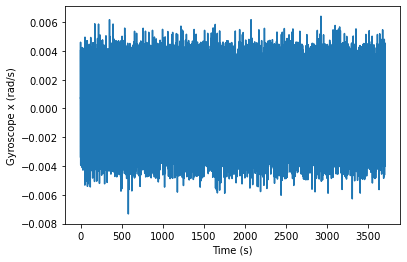

In [7]:
#plt.figure(figsize=(6.8, 4.2))
x = data['Time (s)']
plt.plot(x, data['Gyroscope x (rad/s)'])
#plt.xticks(x, data['Time (s)'])
plt.xlabel('Time (s)')
plt.ylabel('Gyroscope x (rad/s)')
# plt.show()

plt.savefig(os.path.join(figure_path, 'raw_x.png'), dpi = 300, bbox_inches = 'tight')

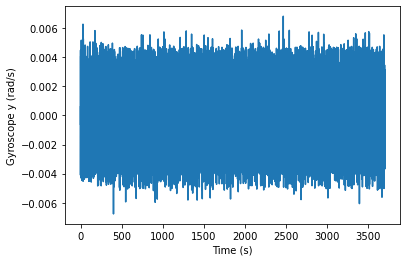

In [14]:
x = data['Time (s)']
plt.plot(x, data['Gyroscope y (rad/s)'])
plt.xlabel('Time (s)')
plt.ylabel('Gyroscope y (rad/s)')
# plt.show()

plt.savefig(os.path.join(figure_path, 'raw_y.png'), dpi = 300, bbox_inches = 'tight')

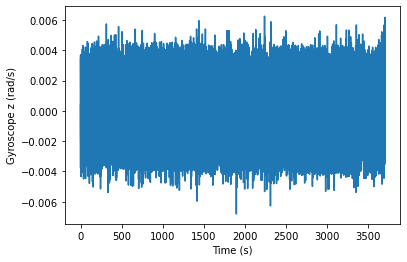

In [15]:
x = data['Time (s)']
plt.plot(x, data['Gyroscope z (rad/s)'])
plt.xlabel('Time (s)')
plt.ylabel('Gyroscope z (rad/s)')
# plt.show()

plt.savefig(os.path.join(figure_path, 'raw_z.png'), dpi = 300, bbox_inches = 'tight')

# Absolute value plot ignore

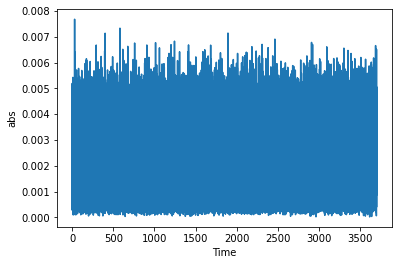

In [154]:
x = data['Time (s)']
plt.plot(x, data['Absolute (rad/s)'])
plt.xlabel('Time')
plt.ylabel('abs')
plt.show()

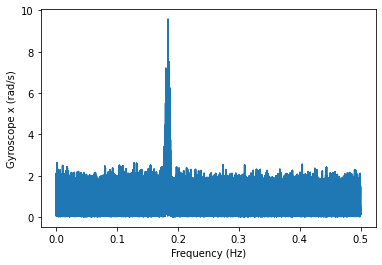

In [10]:
freq = abs(np.fft.fftfreq(len(data["Time (s)"])))
yn = data['Gyroscope x (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gyroscope x (rad/s)')
plt.plot(freq, yfft)

plt.savefig(os.path.join(figure_path, 'fft_x.png'), dpi = 300, bbox_inches = 'tight')

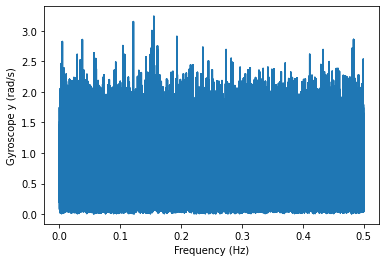

In [11]:
freq = abs(np.fft.fftfreq(len(data["Time (s)"])))
yn = data['Gyroscope y (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gyroscope y (rad/s)')
plt.plot(freq, yfft)

plt.savefig(os.path.join(figure_path, 'fft_y.png'), dpi = 300, bbox_inches = 'tight')

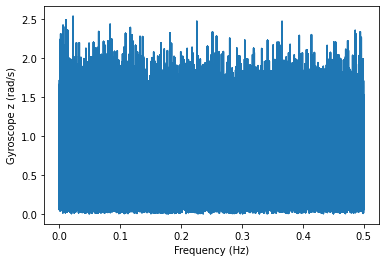

In [12]:
freq = abs(np.fft.fftfreq(len(data["Time (s)"])))
yn = data['Gyroscope z (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gyroscope z (rad/s)')
plt.plot(freq, yfft)

plt.savefig(os.path.join(figure_path, 'fft_z.png'), dpi = 300, bbox_inches = 'tight')

# Abs ignore

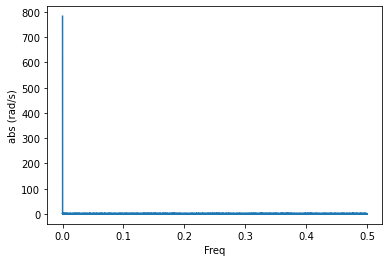

In [53]:
freq = abs(np.fft.fftfreq(len(data["Time (s)"])))
yn = data['Absolute (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
plt.xlabel('Freq')
plt.ylabel('abs (rad/s)')
plt.plot(freq, yfft)

In [58]:
help(allantools)

Help on package allantools:

NAME
    allantools

PACKAGE CONTENTS
    allantools
    ci
    dataset
    noise
    noise_kasdin
    plot
    realtime

CLASSES
    builtins.object
        allantools.dataset.Dataset
        allantools.noise_kasdin.Noise
        allantools.plot.Plot
    
    class Dataset(builtins.object)
     |  Dataset(data=None, rate=1.0, data_type='phase', taus=None)
     |  
     |  Dataset class for Allantools
     |  
     |  :Example:
     |      ::
     |  
     |          import numpy as np
     |          # Load random data
     |          a = allantools.Dataset(data=np.random.rand(1000))
     |          # compute mdev
     |          a.compute("mdev")
     |          print(a.out["stat"])
     |  
     |  compute() returns the result of the computation and also stores it in the
     |  object's ``out`` member.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, data=None, rate=1.0, data_type='phase', taus=None)
     |      Initialize object w

In [145]:
t = data['Time (s)'].to_numpy()
yn = data['Gyroscope x (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
a = allantools.Dataset(yn, taus=t, data_type="freq")
result = a.compute("adev")

print(vars(a))

allan_dev = result["stat"]
tau = result["taus"]
int_err = result['stat_err'] * np.sqrt(tau)
int_err_avg = np.mean(int_err)
print(int_err_avg)
allan_dev = allan_dev[np.where(tau <=700)]
tau = tau[np.where(tau <=700)]

log_allandev = np.log(allan_dev)
log_tau = np.log(tau)

slope, intercept = np.polyfit(log_tau, log_allandev, 1)

print(slope, intercept, np.exp(intercept))


{'inp': {'data': array([ 0.00072995,  0.0006458 , -0.0006945 , ...,  0.00158002,
        0.00454864, -0.00059669]), 'rate': 1.0, 'data_type': 'freq', 'taus': array([8.97416670e-03, 1.90531667e-02, 2.91311667e-02, ...,
       3.70018870e+03, 3.70019879e+03, 3.70020887e+03])}, 'out': {'taus': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 3.698e+03, 3.699e+03,
       3.700e+03]), 'stat': array([1.34854405e-03, 1.10638713e-03, 8.99082715e-04, ...,
       1.67898862e-05, 1.58199420e-05, 1.55134089e-05]), 'stat_err': array([2.22630253e-06, 2.58310667e-06, 2.57087578e-06, ...,
       1.69603463e-06, 1.59805547e-06, 1.56709095e-06]), 'stat_n': array([3.66912e+05, 1.83455e+05, 1.22303e+05, ..., 9.80000e+01,
       9.80000e+01, 9.80000e+01]), 'stat_id': 'adev'}}
7.918031941069386e-05
-0.5000277171285019 -6.578801332142046 0.0013895138626099724


4.047972956875074e-05
-0.5000277171285019 -6.578801332142046 0.0013895138626099724


/var/folders/lq/32167fz10179drz_rw4nmmy40000gn/T/ipykernel_34400/3066639571.py:37: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  b.ax.set_xlim(xmin=0)


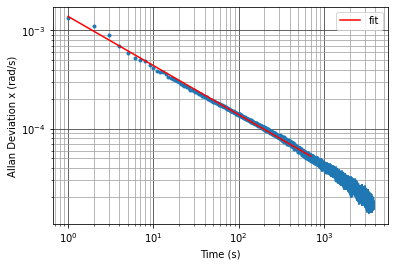

In [16]:
t = data['Time (s)'].to_numpy()
yn = data['Gyroscope x (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
a = allantools.Dataset(yn, taus=t, data_type="freq")
result = a.compute("adev")

# print(vars(a))

allan_dev = result["stat"]
tau = result["taus"]
allan_err = result['stat_err']

allan_err = allan_err[np.where(tau <=700)]
allan_dev = allan_dev[np.where(tau <=700)]
tau = tau[np.where(tau <=700)]

int_err = allan_err * np.sqrt(tau)
int_err_avg = np.mean(int_err)
print(int_err_avg)

log_allandev = np.log(allan_dev)
log_tau = np.log(tau)

slope, intercept = np.polyfit(log_tau, log_allandev, 1)

print(slope, intercept, np.exp(intercept))


b = allantools.Plot()
b.plot(a, errorbars=True, grid=True, marker='o', ls='', ms=3.0, zorder=2)
plt.loglog(tau, np.exp(intercept) * tau**slope, color="r", zorder=3, label = 'fit')
# plt.loglog(tau, 0.0014 * tau**(-0.5), color="y", zorder=3)
# np.log(a)
b.ax.set_xlabel("Time (s)")
b.ax.set_ylabel("Allan Deviation x (rad/s)")
b.ax.legend()
b.ax.set_xlim(xmin=0)
# b.show()

plt.savefig(os.path.join(figure_path, 'allan_x.png'), dpi = 300, bbox_inches = 'tight')

4.203096700785472e-05
-0.4942736782740857 -6.575093985340962 0.001394674833226323


/var/folders/lq/32167fz10179drz_rw4nmmy40000gn/T/ipykernel_34400/1634219619.py:37: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  b.ax.set_xlim(xmin=0)


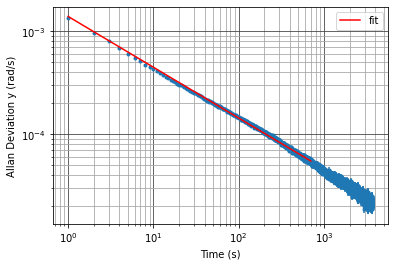

In [17]:
t = data['Time (s)'].to_numpy()
yn = data['Gyroscope y (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
a = allantools.Dataset(yn, taus=t, data_type="freq")
result = a.compute("adev")

# print(vars(a))

allan_dev = result["stat"]
tau = result["taus"]
allan_err = result['stat_err']

allan_err = allan_err[np.where(tau <=700)]
allan_dev = allan_dev[np.where(tau <=700)]
tau = tau[np.where(tau <=700)]

int_err = allan_err * np.sqrt(tau)
int_err_avg = np.mean(int_err)
print(int_err_avg)

log_allandev = np.log(allan_dev)
log_tau = np.log(tau)

slope, intercept = np.polyfit(log_tau, log_allandev, 1)

print(slope, intercept, np.exp(intercept))


b = allantools.Plot()
b.plot(a, errorbars=True, grid=True, marker='o', ls='', ms=3.0, zorder=2)
plt.loglog(tau, np.exp(intercept) * tau**slope, color="r", zorder=3, label = 'fit')
# plt.loglog(tau, 0.0014 * tau**(-0.5), color="y", zorder=3)
# np.log(a)
b.ax.set_xlabel("Time (s)")
b.ax.set_ylabel("Allan Deviation y (rad/s)")
b.ax.legend()
b.ax.set_xlim(xmin=0)
# b.show()

plt.savefig(os.path.join(figure_path, 'allan_y.png'), dpi = 300, bbox_inches = 'tight')

3.919709912613117e-05
-0.4861098465091193 -6.69372320820197 0.0012386623790253146


/var/folders/lq/32167fz10179drz_rw4nmmy40000gn/T/ipykernel_34400/1169310666.py:37: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  b.ax.set_xlim(xmin=0)


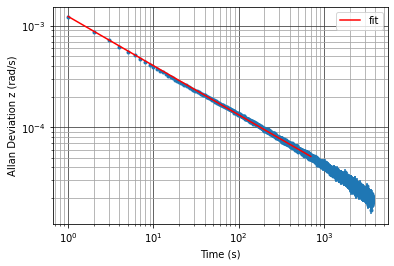

In [18]:
t = data['Time (s)'].to_numpy()
yn = data['Gyroscope z (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
a = allantools.Dataset(yn, taus=t, data_type="freq")
result = a.compute("adev")

# print(vars(a))

allan_dev = result["stat"]
tau = result["taus"]
allan_err = result['stat_err']

allan_err = allan_err[np.where(tau <=700)]
allan_dev = allan_dev[np.where(tau <=700)]
tau = tau[np.where(tau <=700)]

int_err = allan_err * np.sqrt(tau)
int_err_avg = np.mean(int_err)
print(int_err_avg)

log_allandev = np.log(allan_dev)
log_tau = np.log(tau)

slope, intercept = np.polyfit(log_tau, log_allandev, 1)

print(slope, intercept, np.exp(intercept))


b = allantools.Plot()
b.plot(a, errorbars=True, grid=True, marker='o', ls='', ms=3.0, zorder=2)
plt.loglog(tau, np.exp(intercept) * tau**slope, color="r", zorder=3, label = 'fit')
# plt.loglog(tau, 0.0014 * tau**(-0.5), color="y", zorder=3)
# np.log(a)
b.ax.set_xlabel("Time (s)")
b.ax.set_ylabel("Allan Deviation z (rad/s)")
b.ax.legend()
b.ax.set_xlim(xmin=0)
# b.show()

plt.savefig(os.path.join(figure_path, 'allan_z.png'), dpi = 300, bbox_inches = 'tight')

# Ignore below

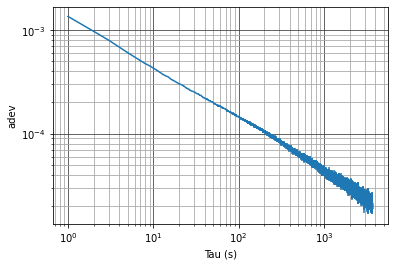

In [97]:
t = data['Time (s)'].to_numpy()
yn = data['Gyroscope y (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
a = allantools.Dataset(yn, taus=t, data_type="freq")
a.compute("adev")
b = allantools.Plot()
b.plot(a, errorbars=True, grid=True)
b.ax.set_xlabel("Tau (s)")
b.show()

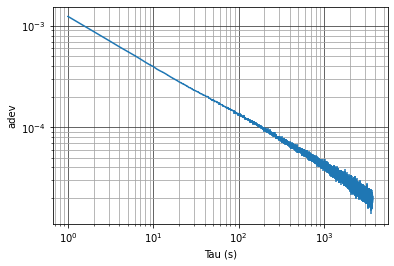

In [98]:
t = data['Time (s)'].to_numpy()
yn = data['Gyroscope z (rad/s)'].to_numpy()
yfft = abs(np.fft.fft(yn))
a = allantools.Dataset(yn, taus=t, data_type="freq")
a.compute("adev")
b = allantools.Plot()
b.plot(a, errorbars=True, grid=True)
b.ax.set_xlabel("Tau (s)")
b.show()